In [1]:
import pandas as pd
df = pd.read_csv('Chatbot_Dataset.csv')
print("Head:\n", df.head())
print("\nTail:\n", df.tail())
print("\nInfo:\n", df.info())
print("\nDescribe:\n", df.describe())


Head:
    flags                                          utterance category  \
0   BILC  I don't have an online account, what do I have...  ACCOUNT   
1  BILQZ  can you tell me if i can regisger two accounts...  ACCOUNT   
2   BPLC         I have no online account, open one, please  ACCOUNT   
3  BIPLD  could you ask an agent how to open an account,...  ACCOUNT   
4   BLQC               i want an online account, create one  ACCOUNT   

           intent  
0  create_account  
1  create_account  
2  create_account  
3  create_account  
4  create_account  

Tail:
        flags                                          utterance  category  \
21529  BILQC  i have no shipping address, what do i have to ...  SHIPPING   
21530   BLQC  I have no shipping address and I want to set o...  SHIPPING   
21531   BIQC  i want to set up my shipping address, what do ...  SHIPPING   
21532   BILC  I don't have a shipping address, can you set o...  SHIPPING   
21533    BQZ                i  wanna set up my 

In [2]:
import pandas as pd
df = pd.read_csv('Chatbot_Dataset.csv')
null_values = df.isnull().sum()
print("Null Values Before Handling:")
print(null_values)
numerical_cols = df.select_dtypes(include=['number']).columns
non_numerical_cols = df.select_dtypes(exclude=['number']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
for col in non_numerical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
df.dropna(inplace=True)
print("\nNull Values After Handling:")
print(df.isnull().sum())


Null Values Before Handling:
flags        0
utterance    0
category     0
intent       0
dtype: int64

Null Values After Handling:
flags        0
utterance    0
category     0
intent       0
dtype: int64


In [3]:
df = pd.read_csv('Chatbot_Dataset.csv')
duplicate_entries=df.duplicated().sum()
print("Number of duplicate entries:", duplicate_entries)
category_values= df['category']
intent_values = df['intent']
inconsistent_entries = (category_values >intent_values).sum()
print("Number of inconsistent entries:", inconsistent_entries)


Number of duplicate entries: 12
Number of inconsistent entries: 0


In [5]:
import pandas as pd
df = pd.read_csv('Chatbot_Dataset.csv') 
reshaped_df = df.pivot_table(index='utterance', columns='category', values='intent', aggfunc='count')
print("Reshaped DataFrame:")
print(reshaped_df.head())
transposed_df = df.T
print("\nTransposed DataFrame:")
print(transposed_df.head())

Reshaped DataFrame:
category                                          ACCOUNT  CANCELLATION_FEE  \
utterance                                                                     
 have a question, can you call Customer Service?      NaN               NaN   
 havent got a user account and i wannaregister        1.0               NaN   
 need ehlp modifying my profile                       1.0               NaN   
 need help informing of issues paying                 NaN               NaN   
 wan to check your money back guarantee               NaN               NaN   

category                                          CONTACT  DELIVERY  FEEDBACK  \
utterance                                                                       
 have a question, can you call Customer Service?      1.0       NaN       NaN   
 havent got a user account and i wannaregister        NaN       NaN       NaN   
 need ehlp modifying my profile                       NaN       NaN       NaN   
 need help informing 

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
df = pd.read_csv('Chatbot_Dataset.csv')  
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['utterance'])  
y = df['intent'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9798003250522406


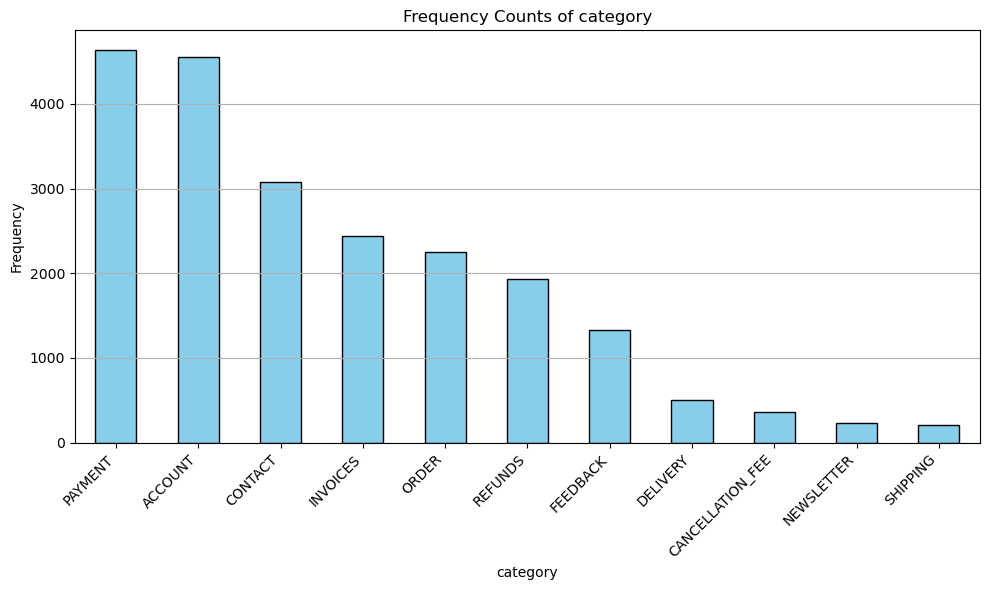


Frequency Counts of category
category
PAYMENT             4636
ACCOUNT             4557
CONTACT             3081
INVOICES            2443
ORDER               2256
REFUNDS             1932
FEEDBACK            1326
DELIVERY             501
CANCELLATION_FEE     360
NEWSLETTER           236
SHIPPING             206
Name: count, dtype: int64


In [7]:
#VISUALIZING THE DATASET USING THE BARPLOT

import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Chatbot_Dataset.csv')  
categorical_variable = 'category'
category_counts = df[categorical_variable].value_counts()
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency Counts of {}'.format(categorical_variable))
plt.xlabel(categorical_variable)
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
print("\nFrequency Counts of", categorical_variable)
print(category_counts)

In [8]:
import csv
with open('Chatbot_Dataset.csv') as file:
    reader = csv.DictReader(file)
    for row in reader:
        flags = row.get('flags', 'N/A')  
        utterance = row['utterance']
        category = row['category']
        intent = row['intent']
        print(f"Flags: {flags}")
        print(f"Utterance: {utterance}")
        print(f"Category: {category}")
        print(f"Intent: {intent}")


Flags: N/A
Utterance: I don't have an online account, what do I have to do to register?
Category: ACCOUNT
Intent: create_account
Flags: N/A
Utterance: can you tell me if i can regisger two accounts with a single email address?
Category: ACCOUNT
Intent: create_account
Flags: N/A
Utterance: I have no online account, open one, please
Category: ACCOUNT
Intent: create_account
Flags: N/A
Utterance: could you ask an agent how to open an account, please?
Category: ACCOUNT
Intent: create_account
Flags: N/A
Utterance: i want an online account, create one
Category: ACCOUNT
Intent: create_account
Flags: N/A
Utterance: i want an account, i need help opening one
Category: ACCOUNT
Intent: create_account
Flags: N/A
Utterance: tell me if I can register  two online accounts with the same email
Category: ACCOUNT
Intent: create_account
Flags: N/A
Utterance: i want to know if i could create two profiles with the same email address
Category: ACCOUNT
Intent: create_account
Flags: N/A
Utterance: can you tell 

In [9]:
import pandas as pd
df = pd.read_csv('Chatbot_Dataset.csv')
utterance_intent_counts = df.groupby(['utterance', 'intent']).size().reset_index(name='Count')
top_utterance_intent_counts = utterance_intent_counts.nlargest(10, 'Count')
print("Top 10 combinations of Utterance and Intent:")
print(top_utterance_intent_counts)


Top 10 combinations of Utterance and Intent:
                                               utterance  \
5877                I want to check the cancellation fee   
6668           I want to know where I can get an invoice   
9121          ask an agent if i can obtain some invoices   
9258   ask an agent to notify a problem making a payment   
9669         can I get the tracking number for my order?   
10116  can u ask an agent for information about reque...   
10141    can u ask an agent how I can obtain an invoice?   
10142   can u ask an agent how I can request an invoice?   
10270       can u ask an agent how to obtain an invoice?   
10318    can u ask an agent if I can change my purchase?   

                       intent  Count  
5877   check_cancellation_fee      2  
6668              get_invoice      2  
9121              get_invoice      2  
9258            payment_issue      2  
9669              track_order      2  
10116             get_invoice      2  
10141             get

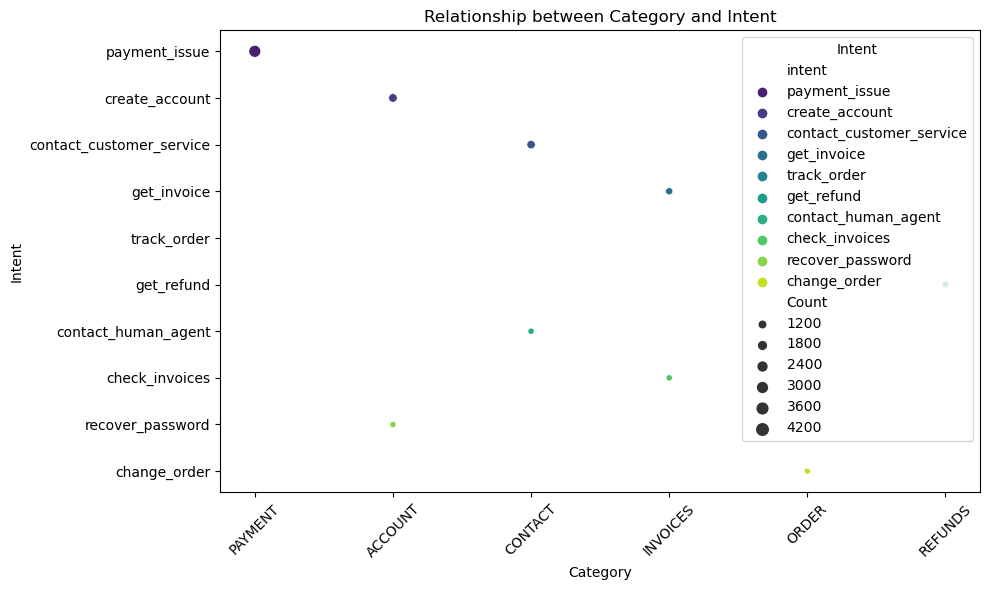

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Chatbot_Dataset.csv')
category_intent_counts = df.groupby(['category', 'intent']).size().reset_index(name='Count')
top_category_intent_counts = category_intent_counts.nlargest(10, 'Count')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_category_intent_counts, x='category', y='intent', size='Count', hue='intent', palette='viridis')
plt.title('Relationship between Category and Intent')
plt.xlabel('Category')
plt.ylabel('Intent')
plt.xticks(rotation=45)
plt.legend(title='Intent')
plt.tight_layout()
plt.show()


Data for Multi Variate analysis:
                                           utterance category          intent
0  I don't have an online account, what do I have...  ACCOUNT  create_account
1  can you tell me if i can regisger two accounts...  ACCOUNT  create_account
2         I have no online account, open one, please  ACCOUNT  create_account
3  could you ask an agent how to open an account,...  ACCOUNT  create_account
4               i want an online account, create one  ACCOUNT  create_account


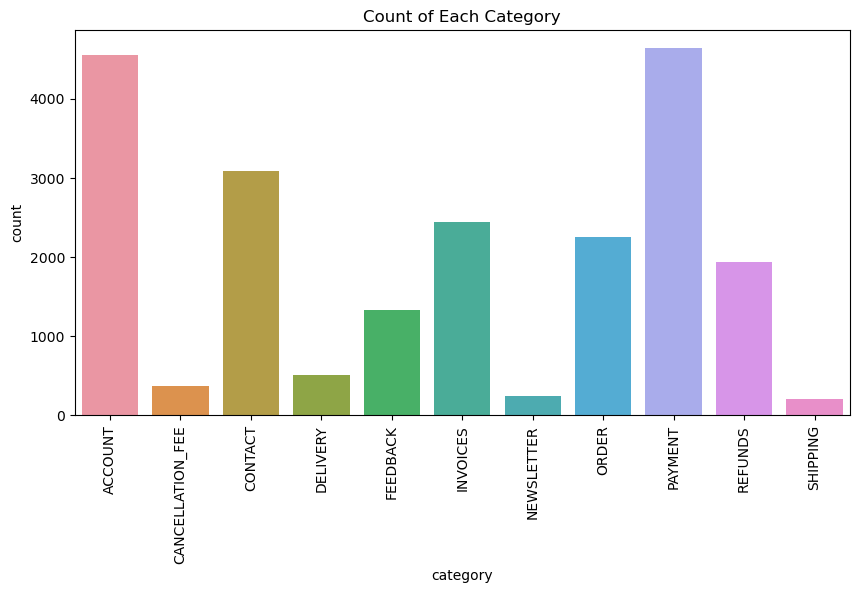

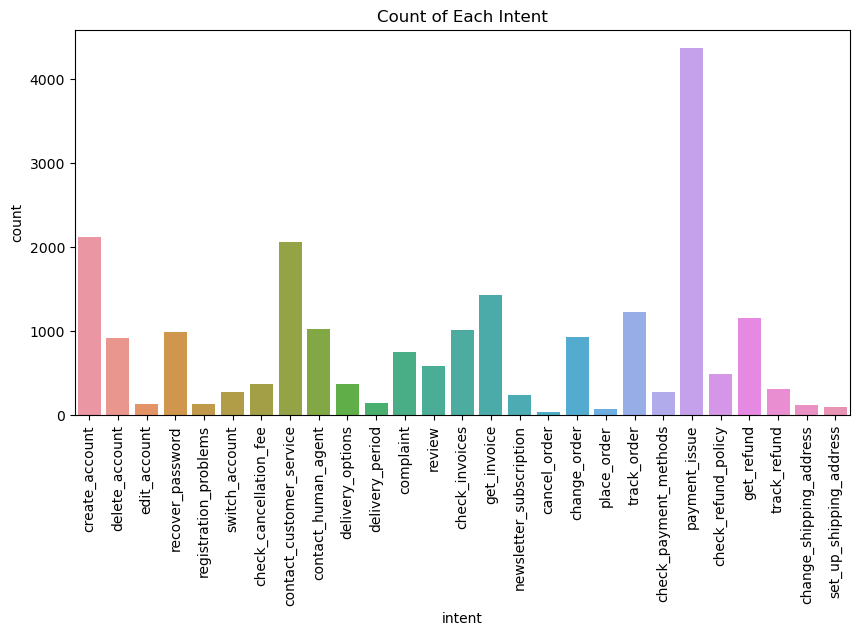

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Chatbot_Dataset.csv')
print("Data for Multi Variate analysis:")
print(df[['utterance', 'category', 'intent']].head())
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='category')
plt.title('Count of Each Category')
plt.xticks(rotation=90)  
plt.show()
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='intent')
plt.title('Count of Each Intent')
plt.xticks(rotation=90) 
plt.show()

       category                   intent
0       ACCOUNT           create_account
1       ACCOUNT           create_account
2       ACCOUNT           create_account
3       ACCOUNT           create_account
4       ACCOUNT           create_account
...         ...                      ...
21520  SHIPPING  set_up_shipping_address
21521  SHIPPING  set_up_shipping_address
21522  SHIPPING  set_up_shipping_address
21523  SHIPPING  set_up_shipping_address
21524  SHIPPING  set_up_shipping_address

[21525 rows x 2 columns]


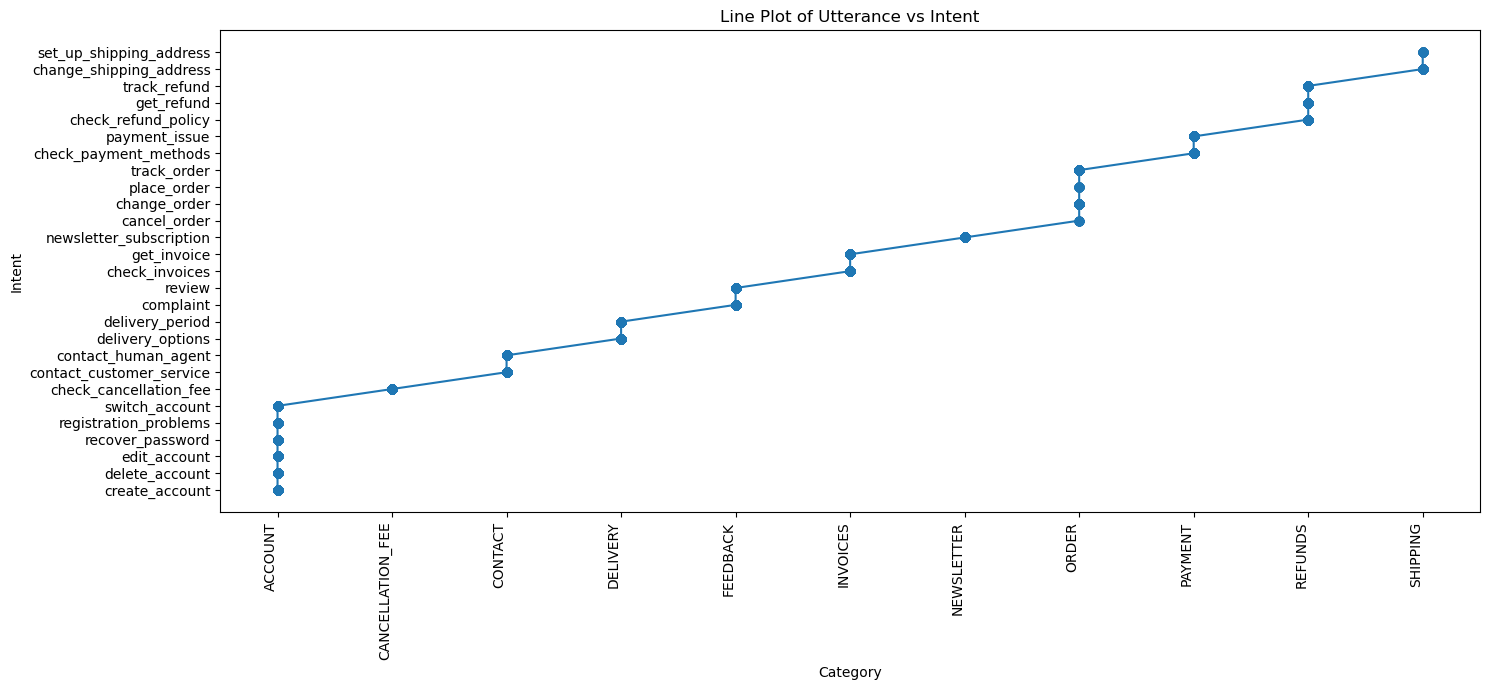

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Chatbot_Dataset.csv')
d_t_p=df[['category','intent']][:21525]
print(d_t_p)
plt.figure(figsize=(15, 7))  
plt.plot(df['category'][:21525], df['intent'][:21525], marker='o', linestyle='-')
plt.title('Line Plot of Utterance vs Intent')
plt.xlabel('Category')
plt.ylabel('Intent')
plt.xticks(rotation=90, ha='right')  
plt.tight_layout() 
plt.show()


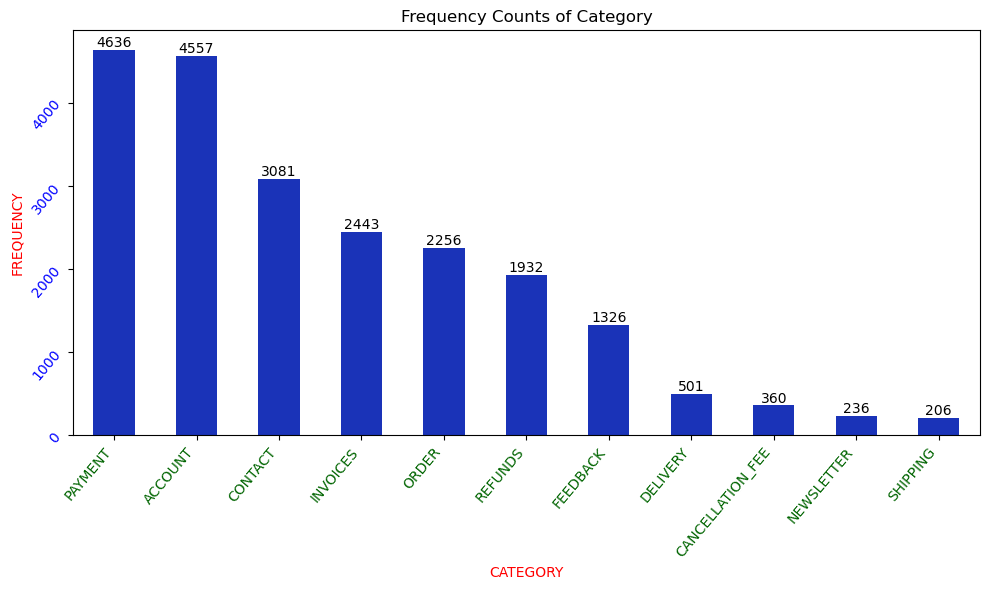

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Chatbot_Dataset.csv')
categorical_variable = 'category'
category_counts = df[categorical_variable].value_counts()
ocean = (0.1, 0.2, 0.720)  
plt.figure(figsize=(10, 6))
bars = category_counts.plot(kind='bar', color=ocean, edgecolor=None)
plt.title('Frequency Counts of Category', )
plt.xlabel('CATEGORY',color='red')
plt.ylabel('FREQUENCY',color='red')
plt.xticks(rotation=50, ha='right',color='darkgreen')
plt.yticks(rotation=50,color='blue')
plt.tight_layout()
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 5), 
                 textcoords='offset points')
plt.show()


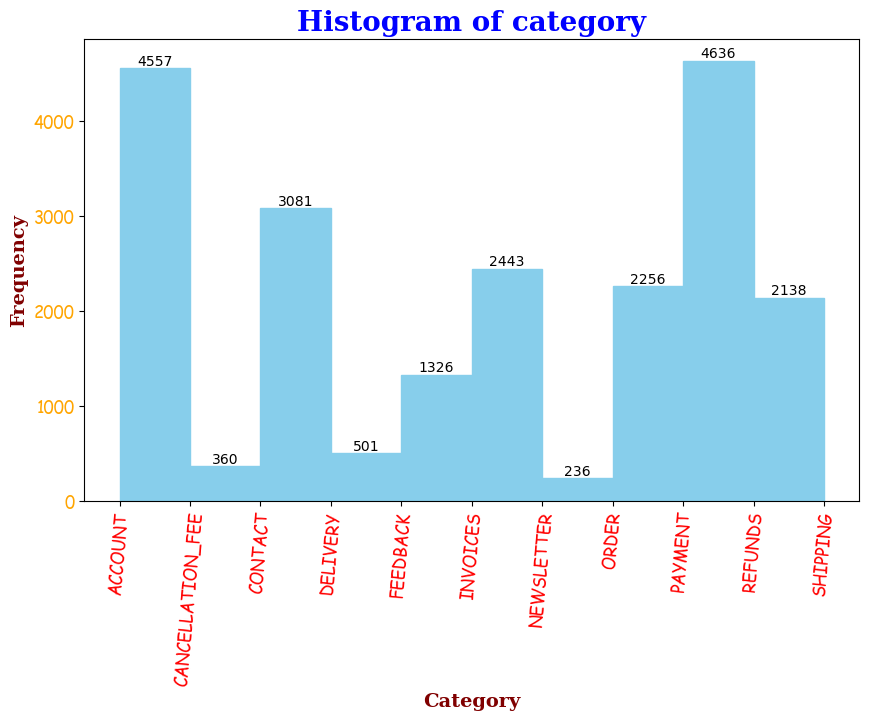

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Chatbot_Dataset.csv')
numerical_variable = 'category'
plt.figure(figsize=(10, 6))
hist_values, bins, _ = plt.hist(df[numerical_variable], bins=10, color='skyblue', edgecolor='skyblue')
plt.title('Histogram of {}'.format(numerical_variable), fontsize=20, fontweight='bold', fontfamily='serif', color='blue')
plt.xlabel('Category', color='maroon', fontsize=14, fontweight='bold', fontfamily='serif')
plt.ylabel('Frequency', color='maroon', fontsize=14, fontweight='bold', fontfamily='serif')
plt.xticks(color='red', rotation=85, fontsize=12, fontfamily='cursive')
plt.yticks(color='orange', fontsize=12, fontfamily='cursive')
for i, count in enumerate(hist_values):
    plt.text((bins[i] + bins[i+1]) / 2, count, str(int(count)), ha='center', va='bottom', color='black')
plt.show()


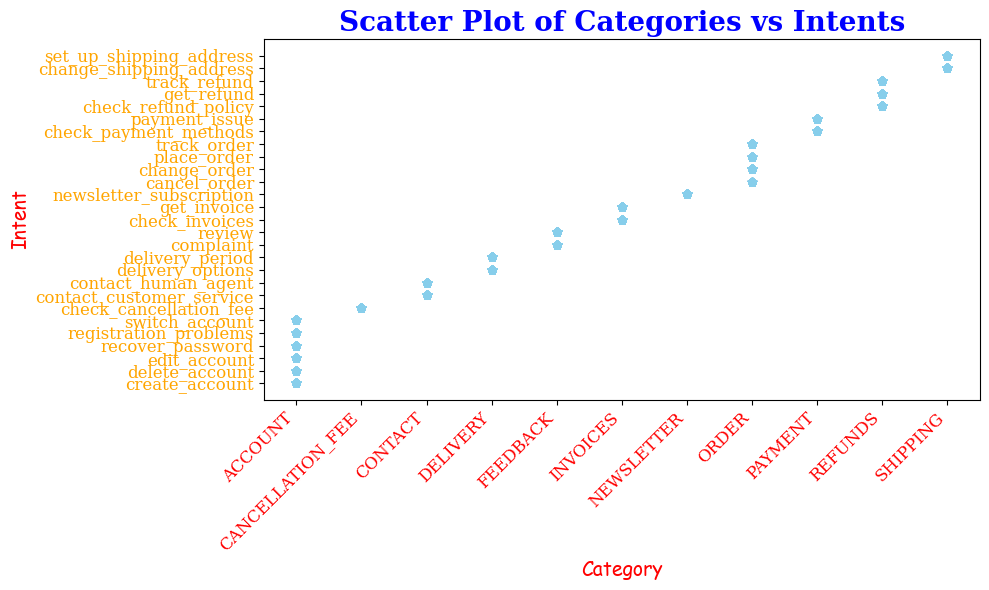

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Chatbot_Dataset.csv')
categories = df['category'].unique()
intents = df['intent'].unique()
category_mapping = {category: i for i, category in enumerate(categories)}
intent_mapping = {intent: i for i, intent in enumerate(intents)}
df['category_mapped'] = df['category'].map(category_mapping)
df['intent_mapped'] = df['intent'].map(intent_mapping)
plt.figure(figsize=(10, 6))
plt.scatter(df['category_mapped'], df['intent_mapped'], color='skyblue',marker='p')
plt.title('Scatter Plot of Categories vs Intents', fontsize=20, fontweight='bold', fontfamily='serif', color='blue')
plt.xlabel('Category', color='red', fontsize=14, fontfamily='cursive')
plt.ylabel('Intent', color='red', fontsize=14, fontfamily='cursive')
plt.xticks(range(len(categories)), categories, rotation=45, ha='right', color='red', fontsize=12, fontfamily='serif')
plt.yticks(range(len(intents)), intents, color='orange', fontsize=12, fontfamily='serif')
plt.tight_layout()
plt.show()


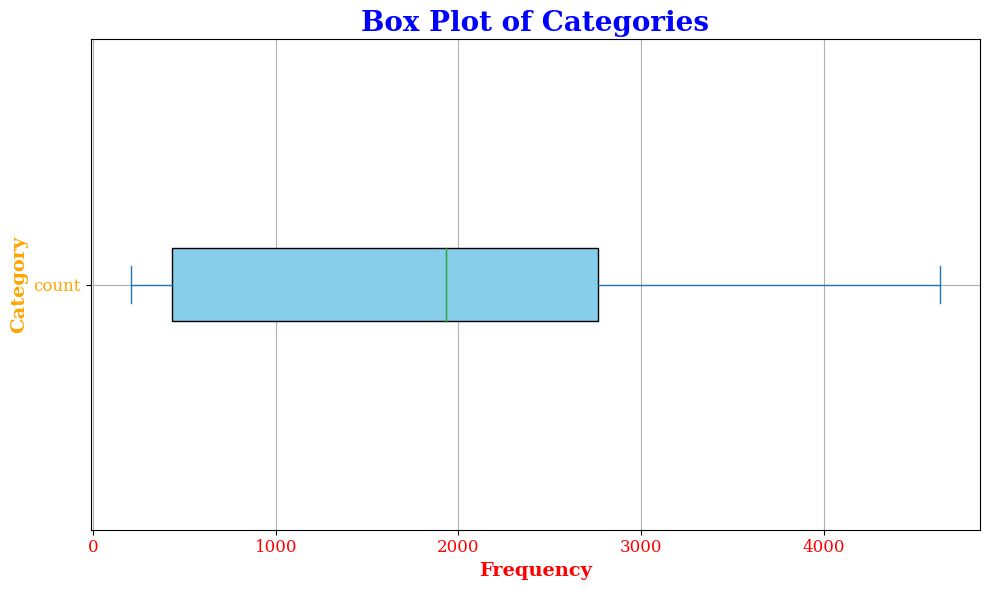

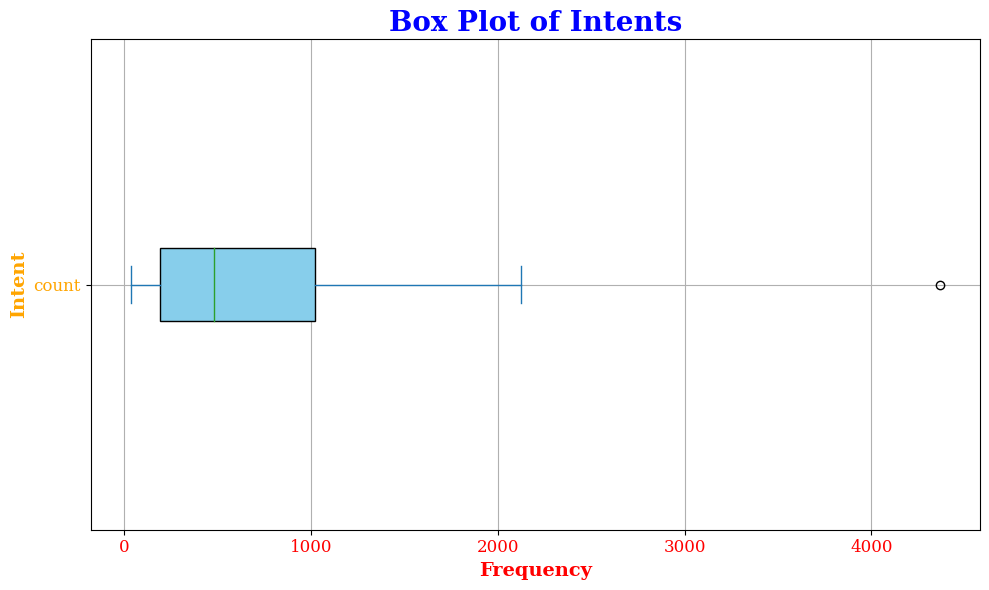

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Chatbot_Dataset.csv')
category_counts = df['category'].value_counts()
intent_counts = df['intent'].value_counts()
plt.figure(figsize=(10, 6))
bp = category_counts.plot(kind='box', vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Box Plot of Categories', fontsize=20, fontweight='bold', fontfamily='serif', color='blue')
plt.xlabel('Frequency', color='red', fontsize=14, fontweight='bold', fontfamily='serif')
plt.ylabel('Category', color='orange', fontsize=14, fontweight='bold', fontfamily='serif')
plt.xticks(color='red', fontsize=12, fontfamily='serif')
plt.yticks(color='orange', fontsize=12, fontfamily='serif')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
bp = intent_counts.plot(kind='box', vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Box Plot of Intents', fontsize=20, fontweight='bold', fontfamily='serif', color='blue')
plt.xlabel('Frequency', color='red', fontsize=14, fontweight='bold', fontfamily='serif')
plt.ylabel('Intent', color='orange', fontsize=14, fontweight='bold', fontfamily='serif')
plt.xticks(color='red', fontsize=12, fontfamily='serif')
plt.yticks(color='orange', fontsize=12, fontfamily='serif')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\sadvi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
findfont: Font family '' not found.
findfont: Font family '' not found.
findfont: Font family '' not found.
findfont: Font family '' not found.
findfont: Font family '' not found.


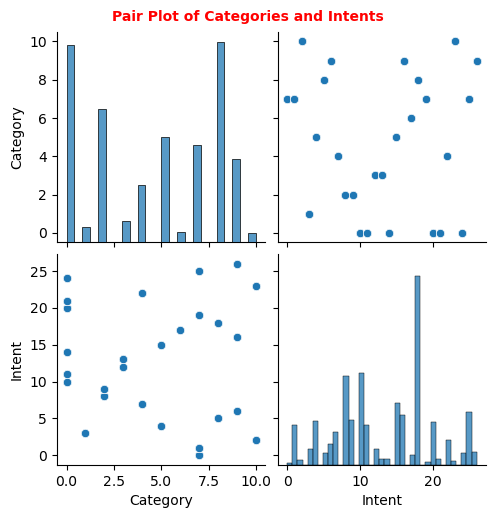

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Chatbot_Dataset.csv')
df['Category'] = df['category'].astype('category').cat.codes
df['Intent'] = df['intent'].astype('category').cat.codes
pairplot_df = df[['Category', 'Intent']]
sns.pairplot(pairplot_df)
plt.suptitle('Pair Plot of Categories and Intents', y=1.02, fontsize=10, fontweight='bold', fontfamily='', color='red')
plt.show()

In [21]:
#plotting using the plotly

import pandas as pd
import plotly.express as px
df = pd.read_csv('Chatbot_Dataset.csv')
df['Category'] = df['category'].astype('category').cat.codes
df['Intent'] = df['intent'].astype('category').cat.codes
fig = px.scatter(df, x='Category', y='Intent',color='category', hover_data=['category', 'intent'],labels={'category_code': 'Category', 'intent_code': 'Intent'}, title='Interactive Scatter Plot of Categories vs Intents')
fig.update_layout(title_font=dict(size=20, family='Copperplate Gothic Bold', color='blue'),xaxis_title_font=dict(size=14, family='Copperplate Gothic Bold', color='red'),yaxis_title_font=dict(size=14, family='Copperplate Gothic Bold', color='orange'),font=dict(family='Copperplate Gothic Bold'))

fig.show()

In [25]:
#

import pandas as pd
import dash
from dash import dcc, html
import plotly.express as px
from dash.dependencies import Input, Output
df = pd.read_csv('Chatbot_Dataset.csv')
df['category_code'] = df['category'].astype('category').cat.codes
df['intent_code'] = df['intent'].astype('category').cat.codes
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1('Interactive Scatter Plot of Categories vs Intents', style={'fontFamily': 'Copperplate Gothic Bold', 'color': 'blue'}),
    dcc.Graph(id='scatter-plot'),])
@app.callback(Output('scatter-plot', 'figure'),Input('scatter-plot', 'id'))
def update_figure(_):
    fig = px.scatter(df, x='category_code', y='intent_code',
                     color='category', hover_data=['category', 'intent'],
                     labels={'category_code': 'Category', 'intent_code': 'Intent'})
    fig.update_layout(title_font=dict(size=20, family='Copperplate Gothic Bold', color='blue'),
        xaxis_title_font=dict(size=14, family='Copperplate Gothic Bold', color='red'),
        yaxis_title_font=dict(size=14, family='Copperplate Gothic Bold', color='orange'),
        font=dict(family='Copperplate Gothic Bold'))
    return fig
if __name__ == '__main__':
    app.run_server(debug=True,port=8052)

In [26]:
#Logistic regression algorithm
# Simple Chatbot for E commerce website...

#You could see the output isn't accurate at all. It's just a simple beginner level program.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
file_path = 'Chatbot_Dataset.csv'  
df = pd.read_csv(file_path)
X = df['utterance']
y = df['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
responses = {
    "create_account": "Sure, I can help you create an account. Please provide your details.",
    "cancel_order": "To cancel your order, please provide your order ID.",
    "place_order": "Please select the product that you need to place order on ...",
    "check_invoices":"Please enter the Order Id to verify the invoice",
    "change_shipping_address": "Please enter the new shipping address !",
    "check_cancellation_fee":"Your cancellation fee would be the 2% of the price of the product !",
    "check_payment_methods": "You could use Debit card, credit card, UPI for the payment.",
    "check_refund_policy":"The refund amount will be credited to your account within 7 working days.",
    "complaint": "If you have any complaint, Please contact any Live agent for help !",
    "contact_customer_service":"We will notify you when the live agent gives the response to your message !",
    "delete_account":"If you delete your account, your shopping streak would also be deleted, You sure to delete your account ? ",
    "delivery_options":"There are two delivery options.\n1.Open box delivery. \n2.Normal delivery.",
    "delivery_period":"The delivery period is mostly about 2-3 working days !",
    "edit_account":"If you need to edit your account, please click the settings button and click edit account !",
    "get_invoice":"To get the invoice please give us the order details and the product name.",
    "get_refund": "For getting refund you have to request it in the official website",
    "newsletter_subscription":"For additional services, please subscribe to the premium account !",
    "payment_issue":"If there's any issues with your payment please check your internet connection or contact your bank !",
    "recover_password":"For recovering your password, please give forgot password in the login page and do the steps correctly",
    "registration_problems":"If you have any registration problems, please check your internet connection. If the internet connection is fine it might be the server problem, so try again later",
    "review":"Leave the review for the product you've bought !",
    "switch_account":"To switch the account please use the settings menu and click the switch account and select the account you like to switch !",
    
}
def get_response(utterance):
    intent = model.predict([utterance])[0]
    response = responses.get(intent, "I'm not sure how to help with that.")
    return response
def chat():
    print("Hello! How can I assist you today? (type 'exit' to end the chat)")
    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            print("Chatbot: Goodbye!")
            break
        response = get_response(user_input)
        print(f"Chatbot: {response}")
chat()

                          precision    recall  f1-score   support

            cancel_order       1.00      0.90      0.95        10
            change_order       0.98      0.98      0.98       183
 change_shipping_address       1.00      1.00      1.00        25
  check_cancellation_fee       1.00      1.00      1.00        66
          check_invoices       1.00      0.99      0.99       208
   check_payment_methods       1.00      0.96      0.98        52
     check_refund_policy       1.00      0.99      0.99        92
               complaint       1.00      1.00      1.00       146
contact_customer_service       1.00      1.00      1.00       430
     contact_human_agent       1.00      1.00      1.00       198
          create_account       0.98      1.00      0.99       367
          delete_account       1.00      1.00      1.00       204
        delivery_options       0.99      0.99      0.99        74
         delivery_period       1.00      1.00      1.00        32
         